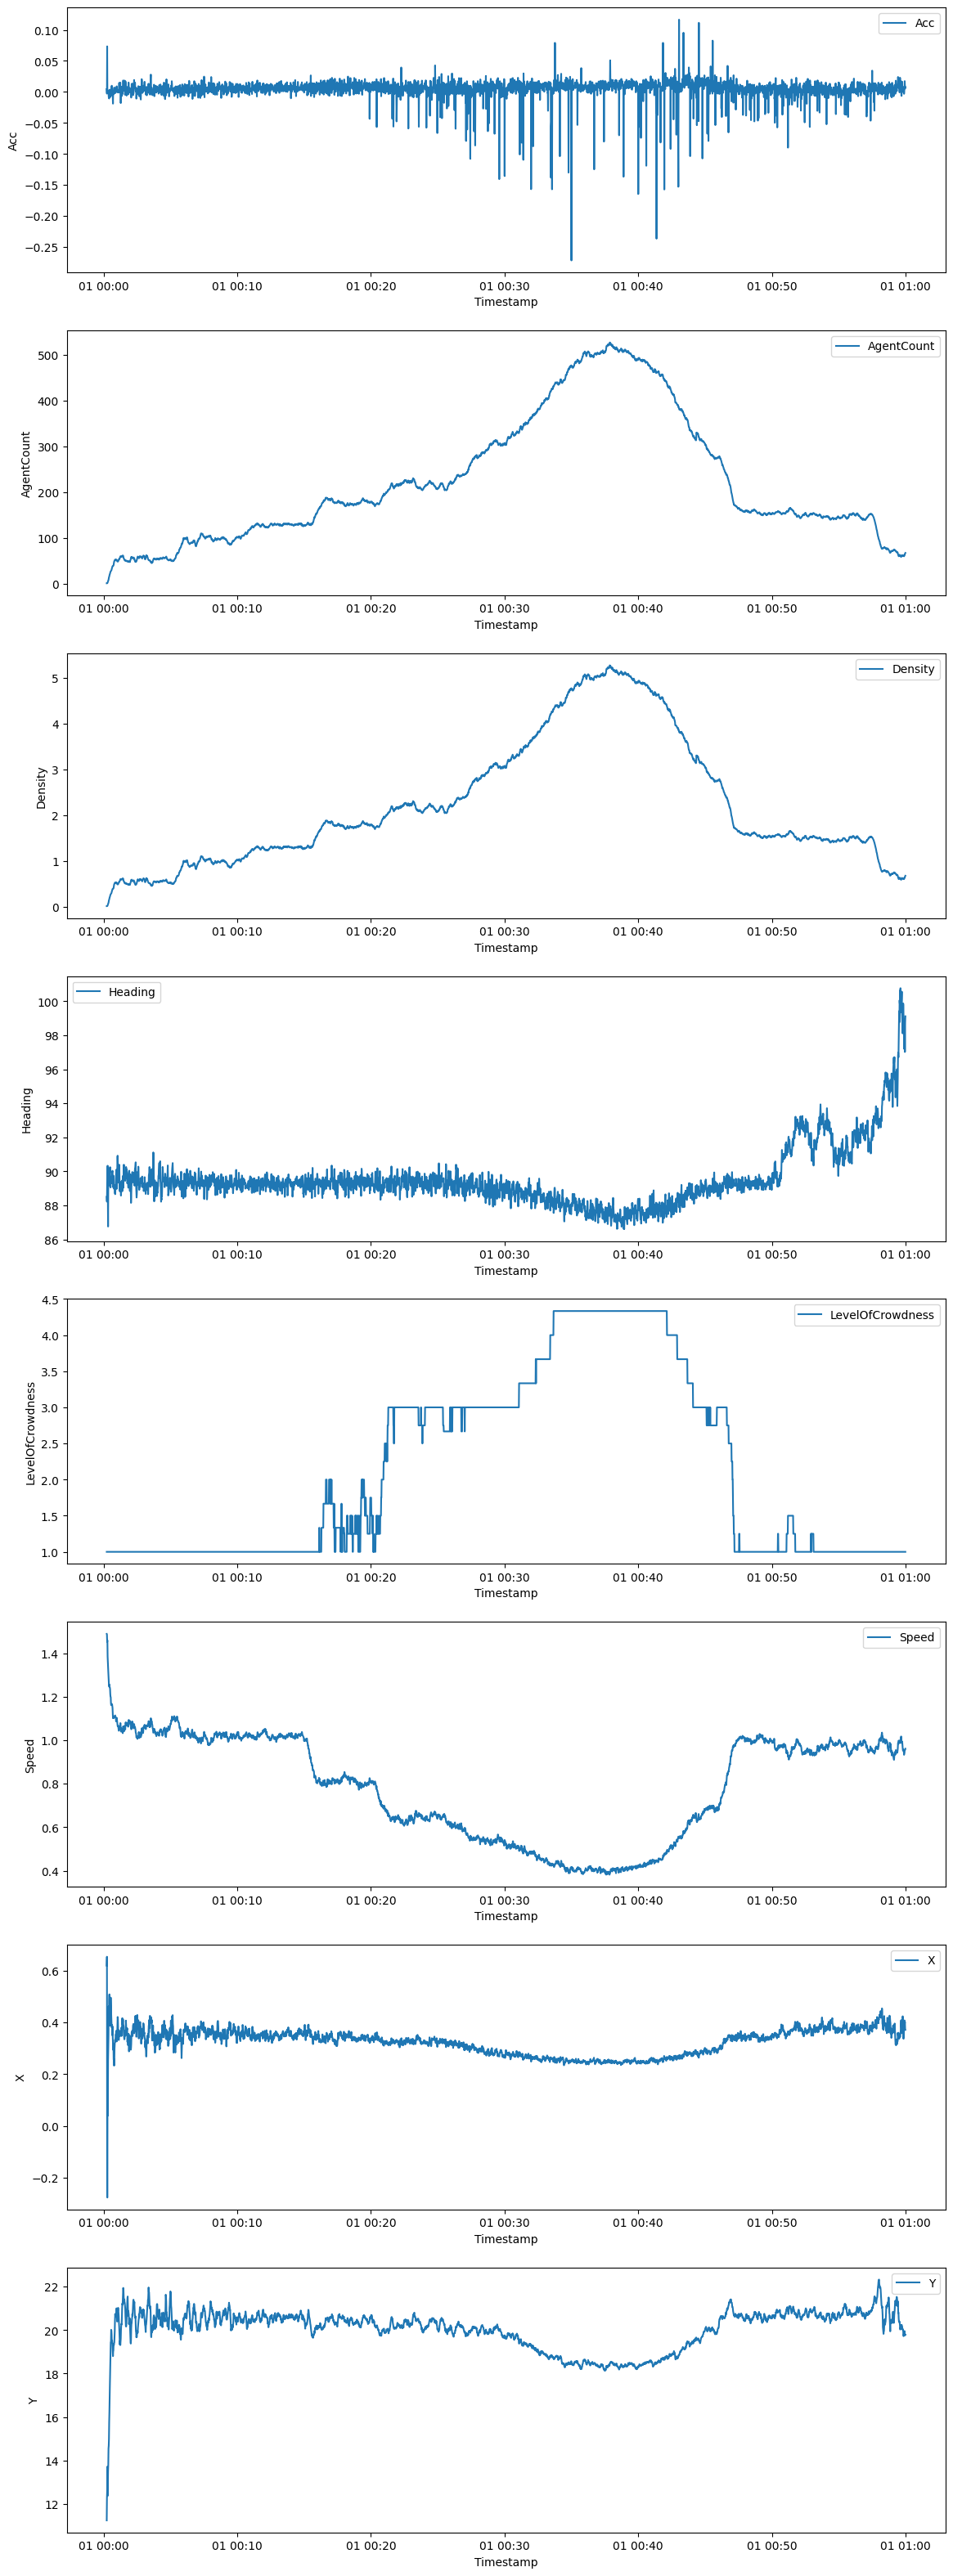

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '1-s2.0-S0957417422008065-mmc1.csv'
data = pd.read_csv(file_path)

# Handle missing values in the 'Acc' column by filling them with the mean of the column
data['Acc'].fillna(data['Acc'].mean(), inplace=True)

# Drop the 'Unnamed: 10' column as it duplicates the 'Label' information
data.drop(columns=['Unnamed: 10'], inplace=True)

# Convert the 'Timestamp' column to a pandas datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S')

# Ensure all timestamps are unique by averaging duplicates
data = data.groupby('Timestamp').mean().reset_index()

# Plot each column against the timestamp
columns_to_plot = data.columns.difference(['Timestamp', 'Label'])

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(12, len(columns_to_plot) * 4))
fig.tight_layout(pad=3.0)

for ax, column in zip(axes, columns_to_plot):
    ax.plot(data['Timestamp'], data[column], label=column)
    ax.set_xlabel('Timestamp')
    ax.set_ylabel(column)
    ax.legend()

plt.show()

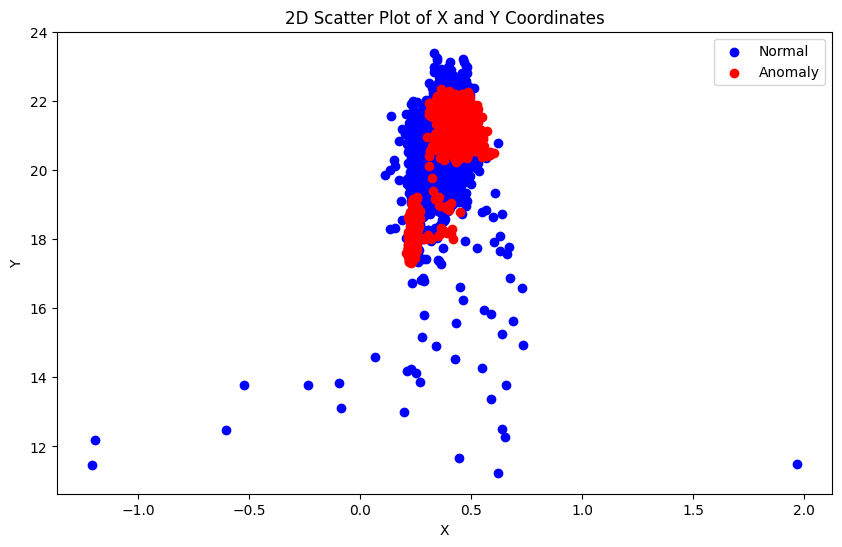

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '1-s2.0-S0957417422008065-mmc1.csv'
data = pd.read_csv(file_path)

# Handle missing values in the 'Acc' column by filling them with the mean of the column
data['Acc'].fillna(data['Acc'].mean(), inplace=True)

# Drop the 'Unnamed: 10' column as it duplicates the 'Label' information
data.drop(columns=['Unnamed: 10'], inplace=True)

# Plot 'X' and 'Y' coordinates in a 2D graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plot normal data points (Label 0)
normal_data = data[data['Label'] == 0]
ax.scatter(normal_data['X'], normal_data['Y'], c='blue', label='Normal')

# Plot anomaly data points (Label 1)
anomaly_data = data[data['Label'] == 1]
ax.scatter(anomaly_data['X'], anomaly_data['Y'], c='red', label='Anomaly')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.set_title('2D Scatter Plot of X and Y Coordinates')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10278
           1       0.90      0.54      0.67      2059

    accuracy                           0.91     12337
   macro avg       0.91      0.76      0.81     12337
weighted avg       0.91      0.91      0.90     12337

Confusion Matrix:
[[10152   126]
 [  951  1108]]


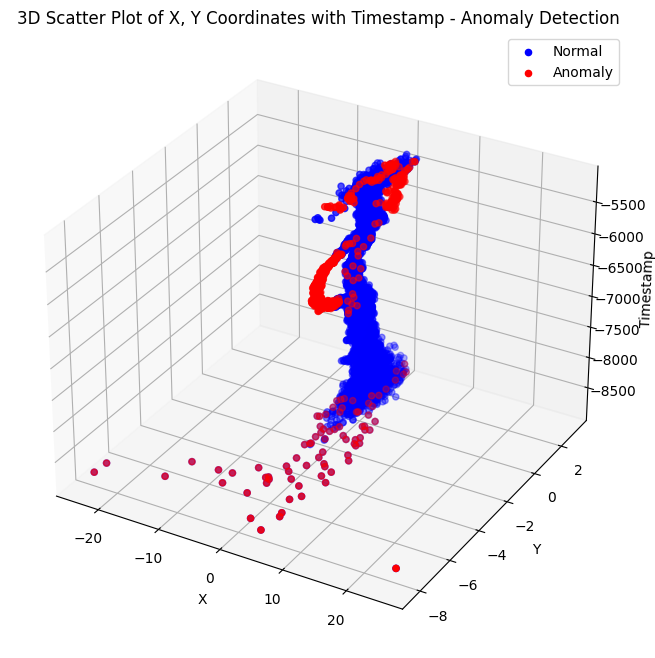

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = '1-s2.0-S0957417422008065-mmc1.csv'
data = pd.read_csv(file_path)

# Handle missing values in the 'Acc' column by filling them with the mean of the column
data['Acc'].fillna(data['Acc'].mean(), inplace=True)

# Drop the 'Unnamed: 10' column as it duplicates the 'Label' information
data.drop(columns=['Unnamed: 10'], inplace=True)

# Convert the 'Timestamp' column to a pandas datetime type
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S')

# Feature selection: excluding 'Timestamp' and 'Label'
features = data.columns.difference(['Timestamp', 'Label'])

# Standardize the features
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Train Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(data[features])

# Predict anomalies (-1 for anomalies, 1 for normal)
data['anomaly'] = model.predict(data[features])
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})  # Convert to binary labels (0: normal, 1: anomaly)

# Evaluation
print("Classification Report:")
print(classification_report(data['Label'], data['anomaly']))

print("Confusion Matrix:")
print(confusion_matrix(data['Label'], data['anomaly']))

# Plotting results
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalize the Timestamp to numerical values for plotting
data['Timestamp_numeric'] = data['Timestamp'].astype('int64') // 10**9

# Plot normal data points (Label 0)
normal_data = data[data['Label'] == 0]
anomaly_data = data[data['Label'] == 1]

# Plotting the normal data
ax.scatter(normal_data['X'], normal_data['Y'], normal_data['Timestamp_numeric'], c='blue', label='Normal')

# Plotting the anomalies detected by the model
anomalies_detected = data[data['anomaly'] == 1]
ax.scatter(anomalies_detected['X'], anomalies_detected['Y'], anomalies_detected['Timestamp_numeric'], c='red', label='Anomaly')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Timestamp')
ax.legend()
ax.set_title('3D Scatter Plot of X, Y Coordinates with Timestamp - Anomaly Detection')

plt.show()